### Lab 7 -- Lake Manly Water Balance

#### Another way to plot...

You can plot data in two ways using `matplotlib`. The first way is how we have been plotting so far, with syntax like `plt.plot(x, y)`. Another way to plot is using an 'object-oriented' approach. This approach gives you more control over what your plots look like and allows you to make subplots (multiple stacked plots) easily. Below is an example of plotting using the object-oriented approach. 

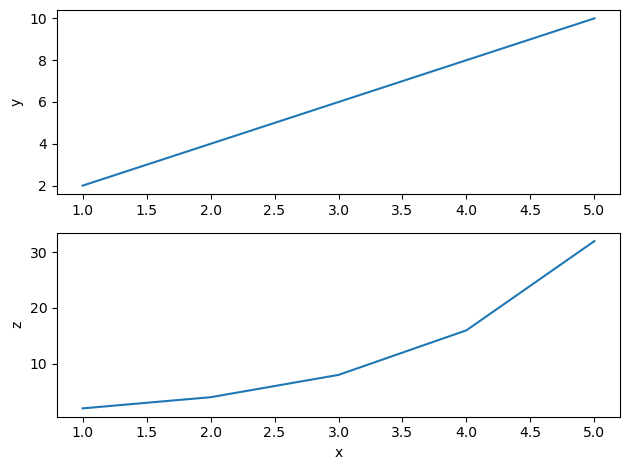

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
z = [2, 4, 8, 16, 32]

fig, axes = plt.subplots(2, 1) # initialize figure and axes; this will create two vertically stacked plots

# plot the data
axes[0].plot(x, y)
axes[1].plot(x, z)

# set a y-label for each subplot (note: syntax slightly different)
axes[0].set_ylabel('y')
axes[1].set_ylabel('z')

plt.xlabel('x') # set an x-label for the whole plot

plt.tight_layout() # makes plots fit together more nicely


#### Plotting climate data from the past 200 ka

Create a figure with four subplots. All subplots should have time from 0 to 200 ka on the x-axis (hint: `sharex`). The top subplot should show solar insolation during June at 65 degrees N for the last 200 ka. The next subplot should show the benthic foraminifera $\delta^{18}$O data from Lisecki and Raymo (2005). The third subplot should show Lake Manly's shoreline elevation, and the final subplot should show the water table elevation at Devil's Hole (near Lake Manly) from Wendt et al. (2018). 

,Sample name,Location,Elevation (masl),Age (yr),2s,Loc
0,DV-20-1 (DV-H),Hanaupah Canyon,-14.0,95500.0,1600.0,W
1,DV-20-2-C (DV-5),Hanaupah Canyon,12.0,126800.0,1200.0,W
2,DV-1-2-B (DV-6),Warm Springs,50.0,127700.0,700.0,W
3,DV-3-1-A,Johnson Canyon,39.7,130600.0,800.0,W
4,DV-1-3-B (DV-7),Warm Springs,50.0,130800.0,700.0,W
5,DV-2-1-B (DV-2),Warm Springs,53.0,131000.0,700.0,W
6,DV-1-2-A,Warm Springs,50.0,131200.0,1100.0,W
7,DV-10-1-A,Basalt Hill,48.2,132100.0,800.0,W
8,DV-3-2 (DV-8),Johnson Canyon,39.6,134300.0,900.0,W
9,DV-10-2B-A,Basalt Hill,50.1,135700.0,900.0,W


,elevation (mawt),age (yr),age_err
0,0.0,1800,35
1,0.0,2765,25
2,1.8,4896,45
3,0.8,5690,80
4,3.1,9200,1500
...,...,...,...
69,5.3,319600,2900
70,1.8,327200,2000
71,3.1,336200,4000
72,4.4,348000,4200


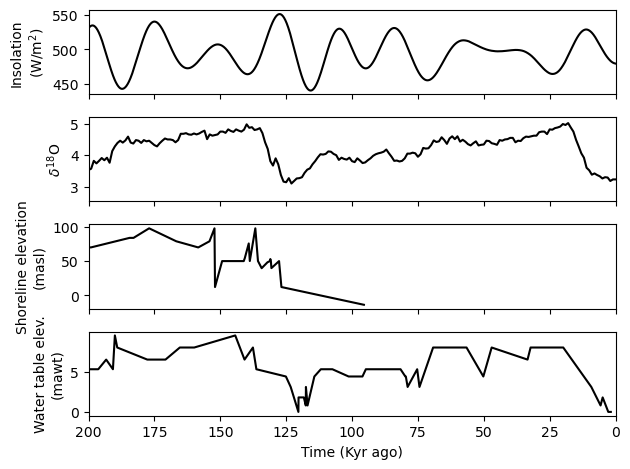

In [11]:
import numpy as np
import pandas as pd 

insolation_data = pd.read_excel("Insolation_200ka.xlsx")  # time in kyr, 0-200kyr (2000 rows)
benthic_data = pd.read_csv("LR04.csv", skiprows = 4)  # kyrs, much farther back
elevation_data = pd.read_excel("Lake_Manly_Age_Elevation.xlsx")  # Age in years
devils_data = pd.read_excel("Wendt_2018_supp.xlsx")  # age in yrs

#### These commented-out commands display the data for preliminary investigation
# display(insolation_data)
# display(benthic_data)
display(elevation_data)
display(devils_data)

# Create a grid of subplots 4 tall and 1 wide, with a shared x-axis
fig, axes = plt.subplots(4, 1, sharex=True)

# On first subplot, plot insolation data vs time from insolation_data in black, and set appropriate label
axes[0].plot(insolation_data["time"], insolation_data["insolation"], color='k')
axes[0].set_ylabel("Insolation\n(W/m$^2$)")

# On second subplot, plot benthic d18O vs time from bbenthic_data in black, and set appropriate label
# Also limit axis to last 200,000 years as data goes back much farther
axes[1].plot(benthic_data["Time (ka)"], benthic_data["Benthic d18O (per mil)  "], color='k')
axes[1].set_xlim(0,200)
axes[1].set_ylabel("$\delta ^{18}$O")

# On third subplot, plot elevation data from lake vs time, dividing age of samples by 1000 as they are in years rather than kyr
# As usual, plot in black and set appropriate label.
axes[2].plot(elevation_data["Age (yr)"]/1000, elevation_data["Elevation (masl)"], color='k')
axes[2].set_ylabel("Shoreline elevation\n(masl)")

# On last subplot, plot elevation vs time (again dividing by 1000 for same reasons as above) in black and with appropriate label
axes[3].plot(devils_data["age (yr)"]/1000, devils_data["elevation (mawt)"], color='k')
axes[3].set_ylabel("Water table elev.\n(mawt)")

# Switch x-axis around so time advances to the right in accordance with the findings of those who sit on the standing committee
plt.gca().invert_xaxis()

# Add appropriate x-axis label
plt.xlabel("Time (Kyr ago)")

plt.tight_layout() # makes plots fit together more nicely


#### Fault-correcting Death Valley data

You saw in the slides that there is a major fault running through the middle of Death Valley that has been active since the deposition of the carbonates dated in our dataset. We have samples on either side of the fault; to create an accurate plot of age vs. elevation, we need to correct for the vertical displacement of the fault. We will assume that the vertical displacement along the fault has happened at a constant rate over the past 200 ka. Create a new column in your DataFrame named `fault_corrected_elev` that reports fault-corrected elevations relative to the west side (i.e., you only need to correct elevations that are east of the fault). Update your plot of Lake Manly age vs. elevation using this fault-corrected data.

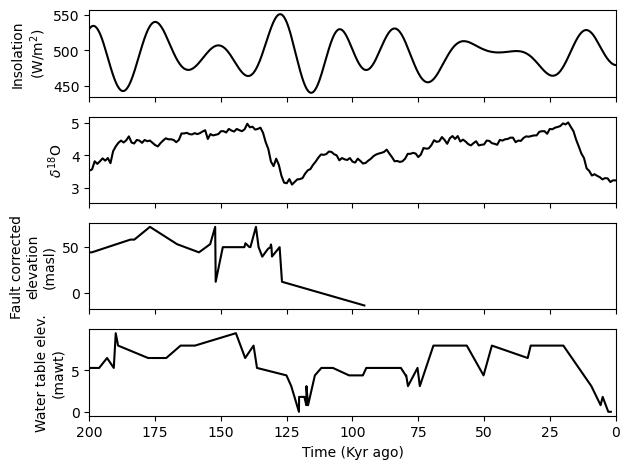

In [12]:
## Two possible pairs for establishing east/west altitude discrepancy: 17(E) & 16(W), or 12(E) & 11(W)
sets = {"E": [17, 12], "W": [16, 11]}
# Set discrep_pair to either 0 or 1 depending on which of the above pairs you would like
discrep_pair = 1

## Difference 
diff = elevation_data["Elevation (masl)"][sets["E"][discrep_pair]] - elevation_data["Elevation (masl)"][sets["W"][discrep_pair]]

# Make empty list for adjusted elevations
adj_elev = []

# iterate through rows in the elevation data
for i in range(len(elevation_data["Elevation (masl)"])):
    # If record is from east side, subtract the calculated difference from altitude and append to list
    if elevation_data["Loc"][i] == "E": 
        adj_elev.append(elevation_data["Elevation (masl)"][i] - diff)
    # If record not from east side, append elevation to list
    else:
        adj_elev.append(elevation_data["Elevation (masl)"][i])

# Add list to elevation_data dataframe (wasn't sure how best to execute--this method came from stackexchange)
elevation_data = elevation_data.assign(fault_corrected_elev = adj_elev)

# display elevation data to verify expected results
# display(elevation_data)


## All of this code is same as above with adjusted elevation in axes[2] instead.

# Create a grid of subplots 4 tall and 1 wide, with a shared x-axis
fig, axes = plt.subplots(4, 1, sharex=True)

# On first subplot, plot insolation data vs time from insolation_data in black, and set appropriate label
axes[0].plot(insolation_data["time"], insolation_data["insolation"], color='k')
axes[0].set_ylabel("Insolation\n(W/m$^2$)")

# On second subplot, plot benthic d18O vs time from bbenthic_data in black, and set appropriate label
# Also limit axis to last 200,000 years as data goes back much farther
axes[1].plot(benthic_data["Time (ka)"], benthic_data["Benthic d18O (per mil)  "], color='k')
axes[1].set_xlim(0,200)
axes[1].set_ylabel("$\delta ^{18}$O")

# On third subplot, plot elevation data from lake vs time, dividing age of samples by 1000 as they are in years rather than kyr
# As usual, plot in black and set appropriate label.
axes[2].plot(elevation_data["Age (yr)"]/1000, elevation_data["fault_corrected_elev"], color='k')
axes[2].set_ylabel("Fault corrected\nelevation\n(masl)")

# On last subplot, plot elevation vs time (again dividing by 1000 for same reasons as above) in black and with appropriate label
axes[3].plot(devils_data["age (yr)"]/1000, devils_data["elevation (mawt)"], color='k')
axes[3].set_ylabel("Water table elev.\n(mawt)")

# Switch x-axis around so time advances to the right in accordance with the findings of those who sit on the standing committee
plt.gca().invert_xaxis()

# Add appropriate x-axis label
plt.xlabel("Time (Kyr ago)")

plt.tight_layout() # makes plots fit together more nicely


#### Short answer questions

1. What is the relationship between $\delta^{18}$O and 65N insolation? Why do you think this is?

There is a correlation between a drop in $\delta^{18}$O and a peak in solar insolation at approximately 130kyr and 25 kyr. This shows an inverse correlation between $\delta^{18}$O and solar insolation. As temperature rises, $\delta^{18}$O lowers which explains why we see this same relationship in the graph. Besides these two points, there is not a clear correlation between the two. This shows there is most likely another factor that is responsible for the drops in $\delta^{18}$O.

2. Skim Wendt et al. (2018). How did they get their data and what do the data show?

They collected 10 cores at Devil's Hole, then subsectioned and took isotope data from uranium found in pedogenic carbonates and opals. This acted as a water-table proxy which they then correlated with glacial and interglacial. Their findings showed that glacial periods corresponded with a wetter climate which caused a recharge of water in the area, which then led to increased water table levels. Specifically, they believe that the high water tables found in Devil's Hole were from increased glaciation in the Sierra Nevada glaciers.

3. Do the lake/water table level trends between Lake Manly and Devil's Hole match? Why do you think they do/don't?

They correspond at around 150 kyr, showing an increase and peak in both of them. This corresponds with a glacial period, so at this time it makes sense that we would see increases in both of them. The high lake level corresponds to high water table elevation during the latter half of the glacial period. Beyond this one correlation, there is not much linking the two.

4. What is the relationship between  $\delta^{18}$O, 65N insolation, and the water level records of Lake Manly/Devil's Hole?

Around 125 kyr, there is a peak in solar insolation which corresponds to the end of a glacial period, seen by the drop in $\delta^{18}$O. Directly before this time, there is data from water tables and lake elevation showing peaks in both which corresponds to the hypothesis of Wendt et al. (2018) that glacial periods correspond to wet periods. After that, corresponding to the $\delta^{18}$O drop, there is a drop in the water table and lake level.

5. Discuss the error on the age data from Lake Manly and Devil's Hole.

There is a significant error in both data sets, which mainly causes problems with our assumption of the offset from tectonic activity. Depending on which set of data points we choose to represent the tectonic activity it changes the elevation of the shoreline from 200-150 kya ago. With one offset we see a shoreline elevation that follows more closely to the devil's hole data, but using a different set of data to correct, we see a completely different trend during this range.  

6. Discuss the assumptions that underpin the Lake Manly age/elevation data.

We assume that each elevation data point is taken from where the surface of the lake was. We assume that there was no radioactive material in the soil before the dating process starts. We assume there is no diogenisis in the carbonates and that the isotopic values are accurately recorded.


#### Water balance modelling

Using Equation 4 from Jones et al. (2007), create a function that calculates evaporation rate (in mm/day).

In [13]:
def calc_evap(T_air, alt, lat, wind_sp, T_min, T_max):

    '''
    Calculates rate of evaporation in mm/day given air temp, altitude, latitude, wind speed, min temp, and max temp

    INPUTS:
        - T_air:     air temp             (C)
        - alt:       altitude             (m)
        - lat:       latitude             (degrees)
        - wind_sp:   wind speed           (m/s)
        - T_min:     minimum temperature  (C)
        - T_max:     maximum temperature  (C)
        
        Note: T_min and T_max are assumed to shift by the same magnitude as T_air

    OUTPUT: Evaporation rate (mm/day)
    '''

    # Calculates dew point using equation given in Jones (2007) from Linacre (1992)
    T_dew = 0.52*T_min + 0.60*T_max - 0.009*(T_max)**2 - 2

    # Calculates and returns evaporation rate using equation given in Jones (2007)
    return (0.015 + T_air*4*10e-4 + alt*10e-6) * (480*(T_air + 0.006*alt) / (84 - lat) - 40 + 2.3*wind_sp*(T_air - T_dew))
    

Since October 1 (the start of the 'water year'), Death Valley has received 18 inches of rain. The average minimum T over this time period has been 10C, the maximum T has been 15C, and average wind velocity has been 2.6 m/s. Using your equation above, would you expect Lake Manly to have had net precipitation or evaporation since the start of the water year? By how much?

In [16]:
days_into_water_yr = 166

avg_evap_rate = calc_evap(12.5, -86, 36.247, 2.6, 10, 15)  # mm/day of evaporation

total_evap = avg_evap_rate * days_into_water_yr

print(f"Average evaporation rate (mm/day): {avg_evap_rate}")
print(f"Total evaporation over {days_into_water_yr} days (mm): {total_evap}")

mm_rain = 18 * 25.4  # mm of rain (18 inches)

net_precipitation = mm_rain - total_evap

print(f"Rain since Oct 1 (mm): {mm_rain}")
print(f"Net precipitation (mm, negative means net evaporation): {net_precipitation}")

Average evaporation rate (mm/day): 6.052466320628443
Total evaporation over 166 days (mm): 1004.7094092243215
Rain since Oct 1 (mm): 457.2
Net precipitation (mm, negative means net evaporation): -547.5094092243214


Using the equation from Jones (2007) we would expect that evaporation exceeds precipitation by about 547mm. We assumed that the air temperature was the average of average minimum temperature (10$^\circ$C) and average maximum temperature (15$^\circ$C), at 12.5$^\circ$C.

Assuming precipitation was held constant at 3 inches per year, how much would evaporation have to increase to explain the shallowing of Lake Manly from 127.7 ka to 95.5 ka?

In [29]:
years = (127.7*10e3) - (95.5*10e3)
print(f"Years: {years}")
net_change_elev = 1000*(-14 - 50)  # mm, total elevation change over period of interest
print(f"Net change in lake level: {net_change_elev} mm")

avg_annual_precip = 3 * 2.54  # mm/yr, average annual precipitation
print(f"Assuming constant precipitation of 3in/yr: {avg_annual_precip} mm")

annual_change_elev = net_change_elev / years  # mm/yr, annual change in elevation
print(f"Average annual change in lake elevation: {annual_change_elev} mm")
annual_evap = avg_annual_precip - annual_change_elev  # mm/yr, average annual evaporation
print(f"Average annual evaporation: {annual_evap} mm")

avg_daily_evap = annual_evap / 365.25  # mm/day, daily change in elevation
print(f"Average daily evaporation: {avg_daily_evap} mm")

Years: 322000.0
Net change in lake level: -64000 mm
Assuming constant precipitation of 3in/yr: 7.62 mm
Average annual change in lake elevation: -0.19875776397515527 mm
Average annual evaporation: 7.818757763975156 mm
Average daily evaporation: 0.021406592098494607 mm


???